In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


In [2]:
# Load the dataset
df = pd.read_csv("Cancer dataset.csv")



In [4]:
# Display the first few rows and dataset information
print(df.head())
print(df.info())

# Drop unnecessary columns
df.drop(columns=['index', 'Patient Id'], axis=1, inplace=True)

# Handle missing values (if any)
df = df.dropna()

# Check for non-numeric columns
non_numeric_columns = df.select_dtypes(exclude=[np.number]).columns
print(f"Non-numeric columns: {non_numeric_columns}")

# Convert non-numeric columns to numeric (if necessary)
df["Level"].replace({'High': 2, 'Medium': 1, 'Low': 0}, inplace=True)
for column in non_numeric_columns:
    df[column] = pd.to_numeric(df[column], errors='coerce')
df.dropna(inplace=True)

# Confirm the dataset is now numeric
print(df.info())



   index Patient Id  Age  Gender  Air Pollution  Alcohol use  Dust Allergy  \
0      0         P1   33       1              2            4             5   
1      1        P10   17       1              3            1             5   
2      2       P100   35       1              4            5             6   
3      3      P1000   37       1              7            7             7   
4      4       P101   46       1              6            8             7   

   OccuPational Hazards  Genetic Risk  chronic Lung Disease  ...  Fatigue  \
0                     4             3                     2  ...        3   
1                     3             4                     2  ...        1   
2                     5             5                     4  ...        8   
3                     7             6                     7  ...        4   
4                     7             7                     6  ...        3   

   Weight Loss  Shortness of Breath  Wheezing  Swallowing Difficulty

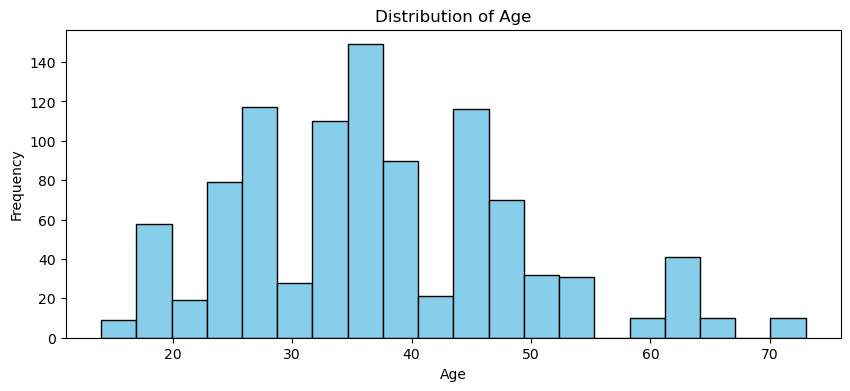

In [5]:
# Exploratory Data Analysis (EDA)
plt.figure(figsize=(10, 4))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()



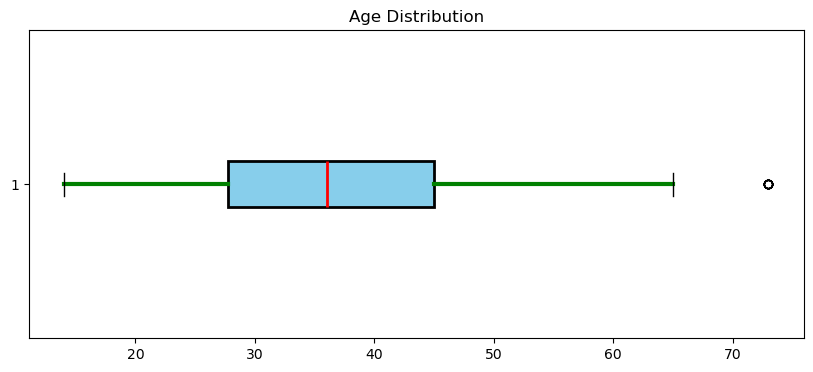

In [6]:
plt.figure(figsize=(10, 4))
plt.boxplot(df['Age'], vert=False, patch_artist=True, 
            boxprops=dict(facecolor='skyblue', linewidth=2),
            whiskerprops=dict(color='green', linewidth=3), 
            medianprops=dict(color='red', linewidth=2))
plt.title('Age Distribution')
plt.show()



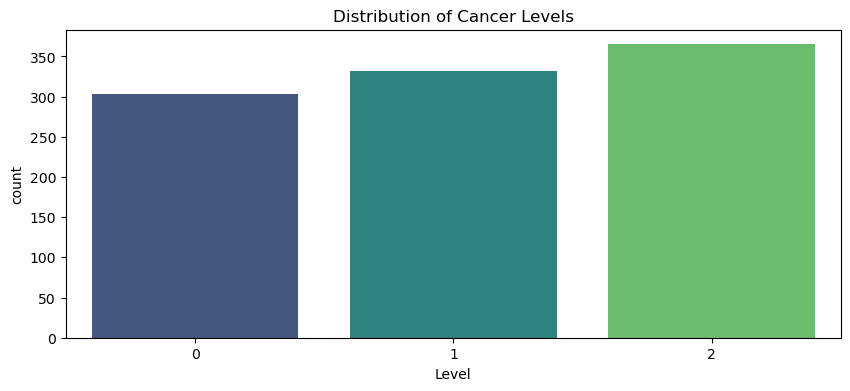

In [8]:
plt.figure(figsize=(10, 4))
sns.countplot(x='Level', data=df, palette='viridis')
plt.title('Distribution of Cancer Levels')
plt.show()



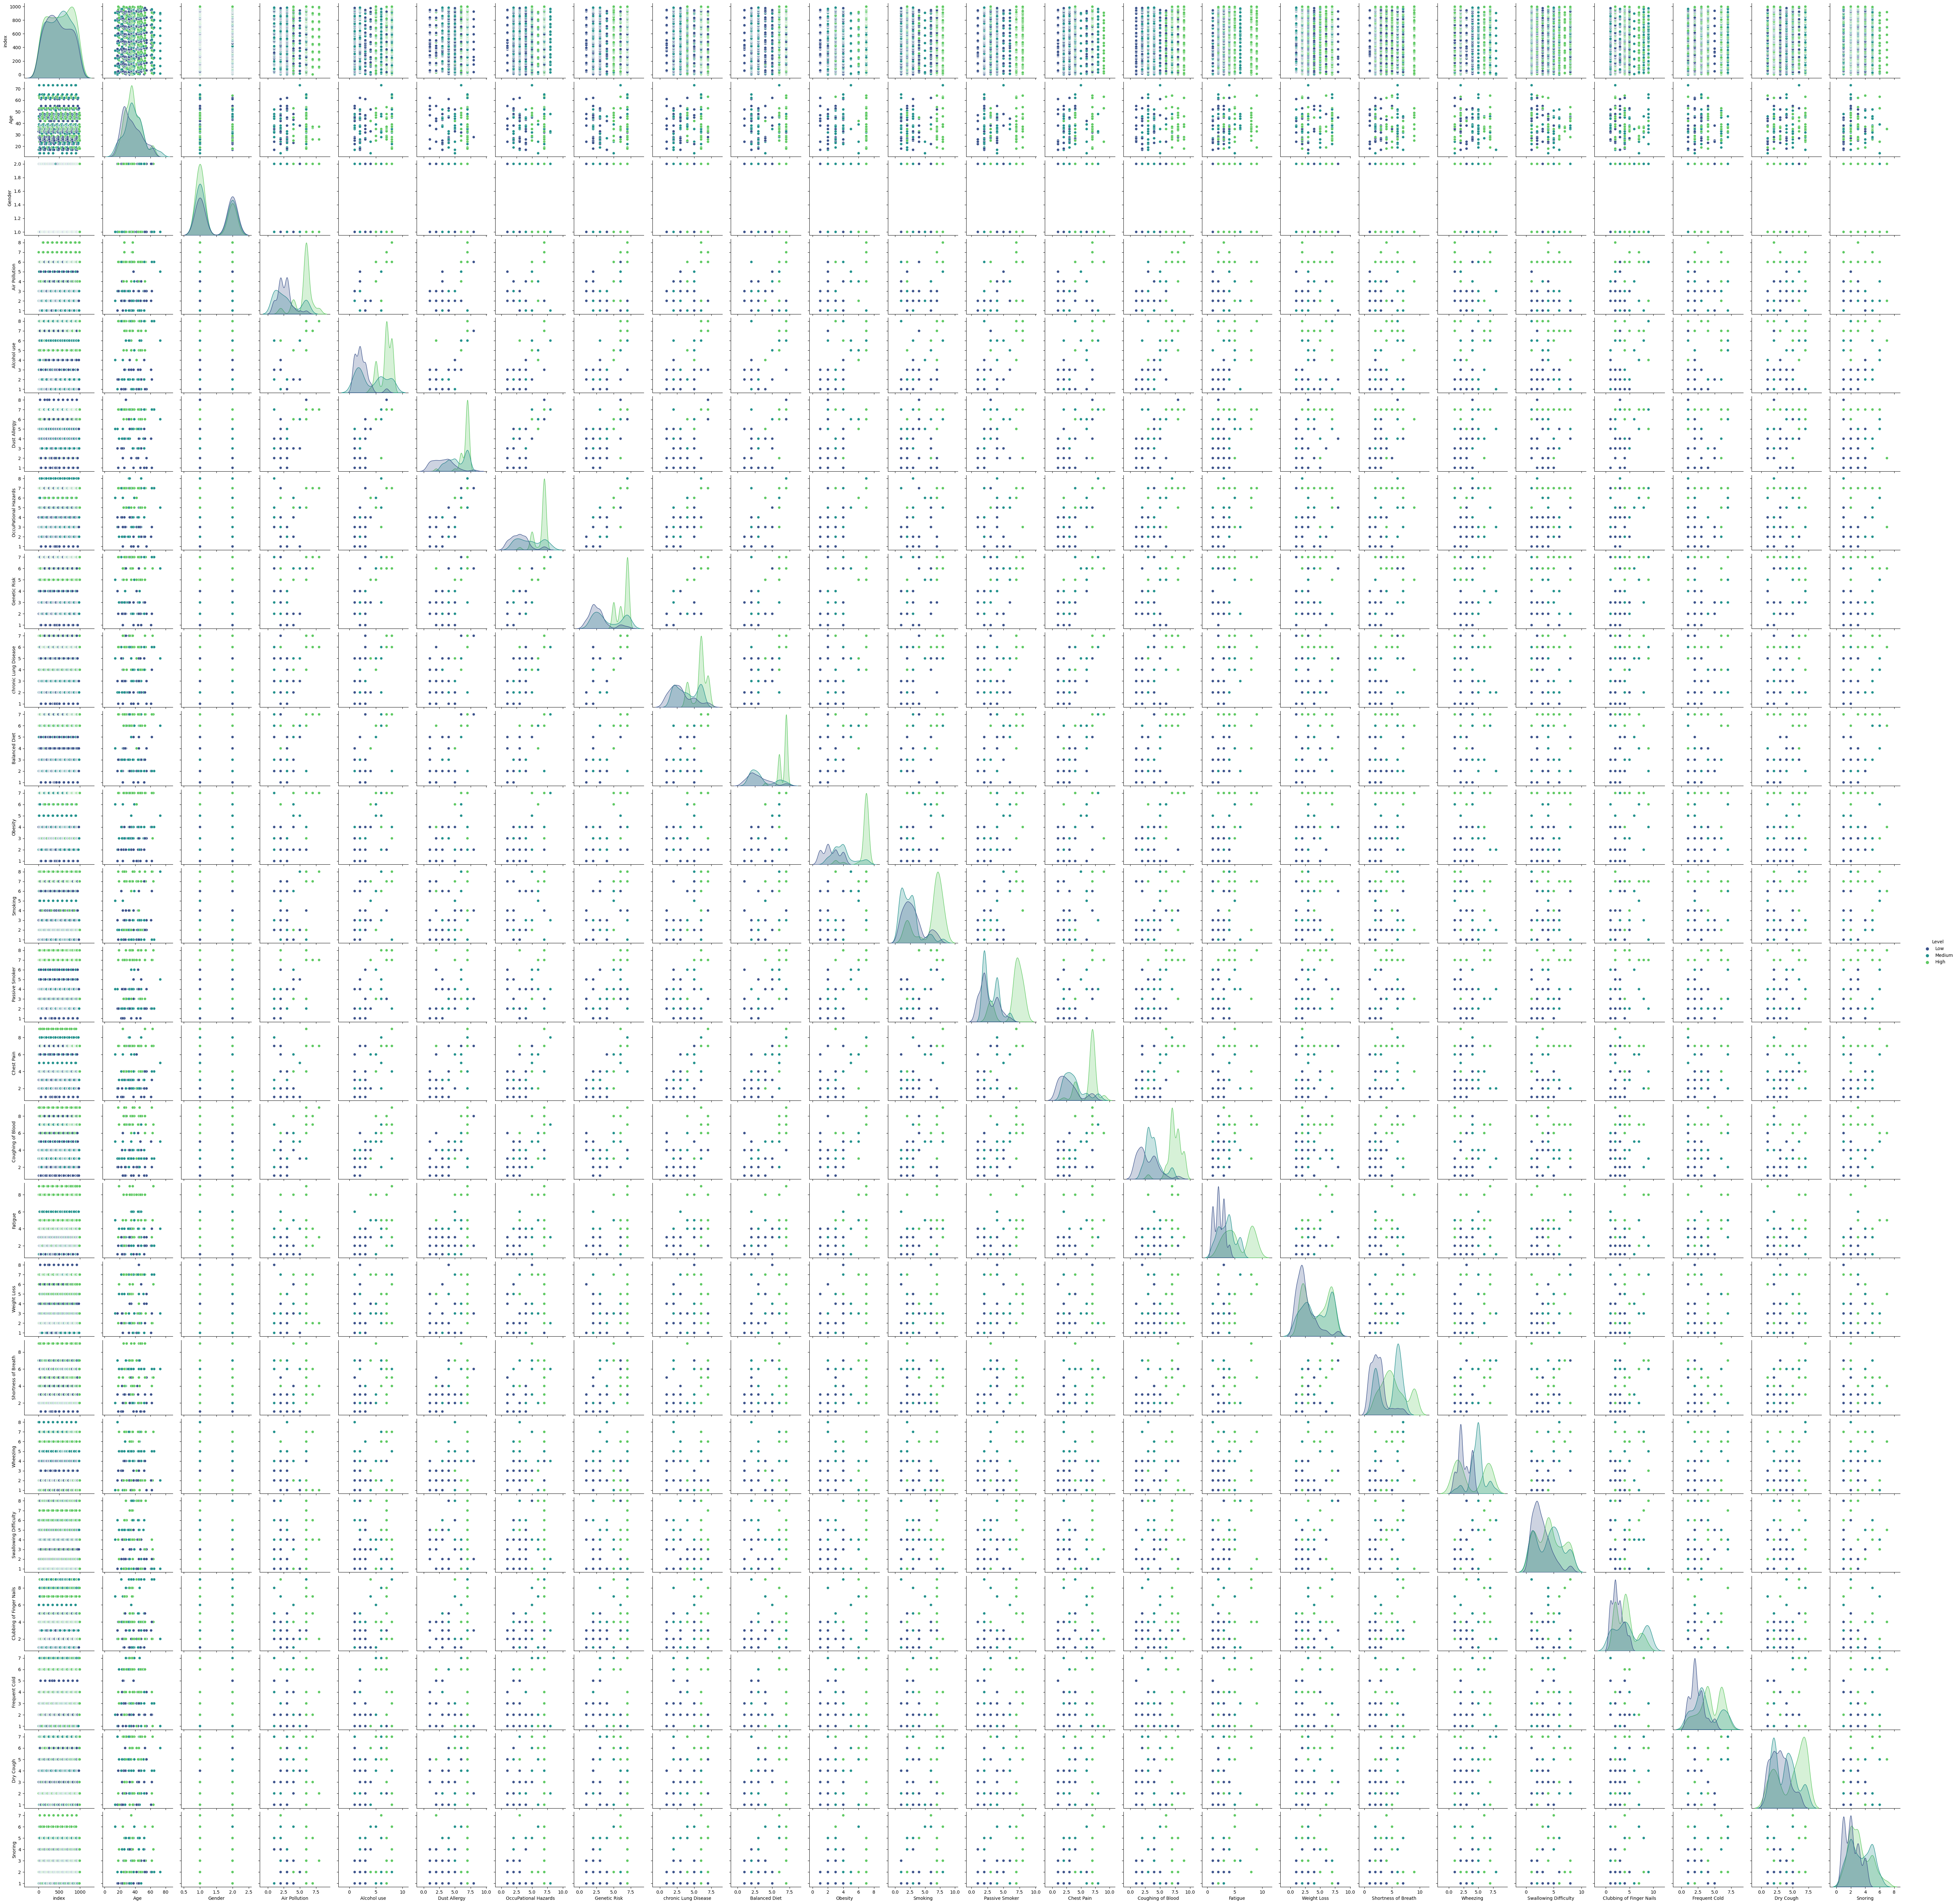

In [4]:
# Pairplot to see interactions between features
sns.pairplot(df, hue='Level', palette='viridis')
plt.show()



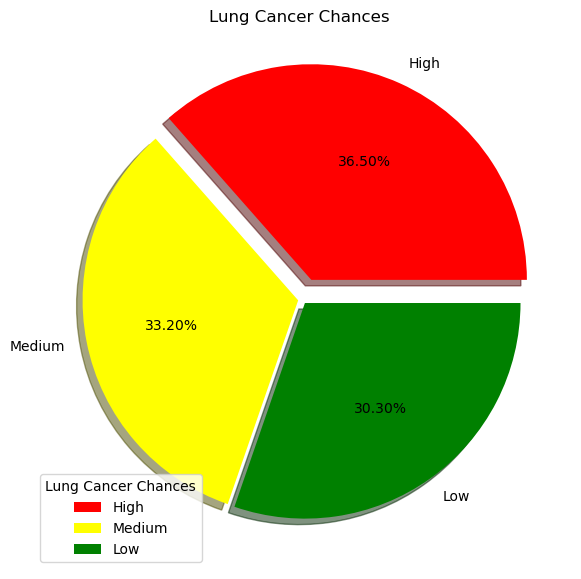

In [8]:
plt.figure(figsize = (15,7))
colors = ['red', 'yellow', 'green']
plt.title("Lung Cancer Chances ")
plt.pie(df['Level'].value_counts(), explode = (0.1, 0.02, 0.02), labels = ['High', 'Medium', 'Low'], autopct = "%1.2f%%", shadow = True, colors = colors)
plt.legend(title = "Lung Cancer Chances", loc = "lower left")

In [12]:
# Data Preprocessing
# Split the data into features and target variable
X = df.drop(columns=['Level'])
y = df['Level']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Handle NaN or infinite values
print("Checking for NaN values in X_train...")
print(X_train.isna().sum())
print("Checking for NaN values in X_test...")
print(X_test.isna().sum())

print("Checking for infinite values in X_train...")
print((X_train == np.inf).sum())
print((X_train == -np.inf).sum())
print("Checking for infinite values in X_test...")
print((X_test == np.inf).sum())
print((X_test == -np.inf).sum())

Checking for NaN values in X_train...
index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use                 0
Dust Allergy                0
OccuPational Hazards        0
Genetic Risk                0
chronic Lung Disease        0
Balanced Diet               0
Obesity                     0
Smoking                     0
Passive Smoker              0
Chest Pain                  0
Coughing of Blood           0
Fatigue                     0
Weight Loss                 0
Shortness of Breath         0
Wheezing                    0
Swallowing Difficulty       0
Clubbing of Finger Nails    0
Frequent Cold               0
Dry Cough                   0
Snoring                     0
dtype: int64
Checking for NaN values in X_test...
index                       0
Patient Id                  0
Age                         0
Gender                      0
Air Pollution               0
Alcohol use 

In [15]:
# Replace NaN and infinite values
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
X_train.replace([np.inf, -np.inf], 0, inplace=True)
X_test.replace([np.inf, -np.inf], 0, inplace=True)



In [16]:
# Ensure all features are numeric
X_train = X_train.apply(pd.to_numeric, errors='coerce')
X_test = X_test.apply(pd.to_numeric, errors='coerce')
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)



In [14]:
# Verify that X_train and X_test have the same columns
assert X_train.columns.tolist() == X_test.columns.tolist(), "Feature columns mismatch between train and test data"



In [18]:
# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [65]:
# Initialize the models
log_reg = LogisticRegression()
rf = RandomForestClassifier()
knn = KNeighborsClassifier()
xgb = XGBClassifier()
gnb = GaussianNB()
sgd = SGDClassifier()
lin_reg = LinearRegression()



In [60]:
# Train the models
log_reg.fit(X_train_scaled, y_train)



LogisticRegression()

In [42]:
rf.fit(X_train_scaled, y_train)s



RandomForestClassifier()

In [47]:
knn.fit(X_train_scaled, y_train)


KNeighborsClassifier()

In [48]:
xgb.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [49]:
gnb.fit(X_train_scaled, y_train)


GaussianNB()

In [50]:
sgd.fit(X_train_scaled, y_train)

SGDClassifier()

In [67]:
lin_reg.fit(X_train_scaled, y_train)

LinearRegression()

In [51]:
# Predict and evaluate
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test_scaled)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_xgb = xgb.predict(X_test_scaled)
y_pred_gnb = gnb.predict(X_test_scaled)
y_pred_sgd = sgd.predict(X_test_scaled)



In [52]:
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)
acc_rf = accuracy_score(y_test, y_pred_rf)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
acc_gnb = accuracy_score(y_test, y_pred_gnb)
acc_sgd = accuracy_score(y_test, y_pred_sgd)



In [68]:
y_pred_lin_reg = lin_reg.predict(X_test_scaled)
mse_lin_reg = mean_squared_error(y_test, y_pred_lin_reg)
r2_lin_reg = r2_score(y_test, y_pred_lin_reg)

In [69]:
print(f'Logistic Regression Accuracy: {acc_log_reg:.2f}')
print(f'Random Forest Accuracy: {acc_rf:.2f}')
print(f'K-Nearest Neighbors Accuracy: {acc_knn:.2f}')
print(f'XGBoost Accuracy: {acc_xgb:.2f}')
print(f'Gaussian Naive Bayes Accuracy: {acc_gnb:.2f}')
print(f'SGD Classifier Accuracy: {acc_sgd:.2f}')
print(f'Linear Regression Mean Squared Error: {mse_lin_reg:.2f}')
print(f'Linear Regression R^2 Score: {r2_lin_reg:.2f}')


Logistic Regression Accuracy: 1.00
Random Forest Accuracy: 1.00
K-Nearest Neighbors Accuracy: 1.00
XGBoost Accuracy: 1.00
Gaussian Naive Bayes Accuracy: 0.90
SGD Classifier Accuracy: 1.00
Linear Regression Mean Squared Error: 0.05
Linear Regression R^2 Score: 0.93
